In [98]:
import numpy as np
import pandas as pd

In [99]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [101]:
X=df.drop('Outcome',axis=1).values      #independent variables
y=df['Outcome'].values

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [103]:
### libraries form pytorch###
import torch
import torch.nn as nn
import torch.nn.functional as F

In [104]:
### creating tensor
### it is necessary to convert in FloatTensor for independent variables
## X is independent function and y is not
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [105]:
### creating model with pytorch##
class ANN_model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return(x)


In [106]:
## instantiate ANN_model
torch.manual_seed(20)
model=ANN_model()

In [107]:
model.parameters

<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [108]:
###Backward propagation ---> Define the loss function , define optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [109]:
epochs=500
final_losses=[]
for i in range (epochs):
    i =i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epochs : {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epochs : 1 and the loss : 3.457212209701538
Epochs : 11 and the loss : 0.8019213080406189
Epochs : 21 and the loss : 0.6090324521064758
Epochs : 31 and the loss : 0.5917770862579346
Epochs : 41 and the loss : 0.5679708123207092
Epochs : 51 and the loss : 0.5529038906097412
Epochs : 61 and the loss : 0.5410097241401672
Epochs : 71 and the loss : 0.5310391783714294
Epochs : 81 and the loss : 0.5220360159873962
Epochs : 91 and the loss : 0.5135970711708069
Epochs : 101 and the loss : 0.5061254501342773
Epochs : 111 and the loss : 0.498340904712677
Epochs : 121 and the loss : 0.4960549771785736
Epochs : 131 and the loss : 0.48286378383636475
Epochs : 141 and the loss : 0.4755901098251343
Epochs : 151 and the loss : 0.48198646306991577
Epochs : 161 and the loss : 0.4806472361087799
Epochs : 171 and the loss : 0.4706907570362091
Epochs : 181 and the loss : 0.45908501744270325
Epochs : 191 and the loss : 0.45079532265663147
Epochs : 201 and the loss : 0.44416534900665283
Epochs : 211 and the 

In [110]:
## plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'epochs')

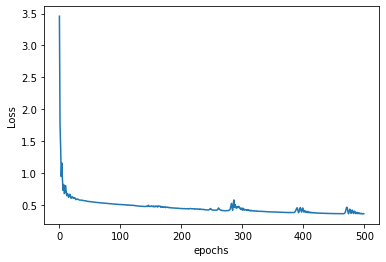

In [111]:
plt.plot(range(epochs),final_losses)
plt.ylabel("Loss")
plt.xlabel('epochs')

In [112]:
## prediction in X_test data
prediction=[]
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred=model(data)
        prediction.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [113]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
cm

array([[92, 15],
       [17, 30]], dtype=int64)

In [114]:
import seaborn as sns

Text(69.0, 0.5, 'predicted values')

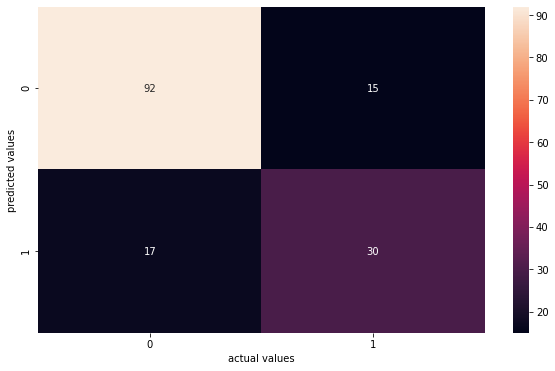

In [115]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('actual values')
plt.ylabel('predicted values')

In [116]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,prediction)
score

0.7922077922077922

In [117]:
### save the model
torch.save(model,"diabetes.pt")

In [118]:
# save and load the model
model=torch.load('diabetes.pt')

In [119]:
model.eval()

ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)